# Data Set Exploration

In [1]:
import re
import numpy as np
import pandas as pd
import itertools
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# `news.csv` Data Set

There are 4 columns: 

- article id
- article title
- article text
- label
 
How many rows? What does the data look like?

In [2]:
#Read the data
df=pd.read_csv('data/news.csv')

#Get shape and head
shape = df.shape
print(f"shape of the dataset: {shape} \n")

df.head(10)

shape of the dataset: (6335, 4) 



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
# Add columns with title char and word counts
title_char_cnt = [len(title) for title in df.title]
df['title_char_cnt'] = title_char_cnt

title_word_cnt = [len(title.split(" ")) for title in df.title]
df['title_word_cnt'] = title_word_cnt

df.head(10)

,Unnamed: 0,title,text,label,title_char_cnt,title_word_cnt
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,5
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,14
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,9
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,15
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,9
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,2
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,13
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,33,5
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,63,9
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,71,11


In [4]:
# Add columns with text char and word counts
text_char_cnt = [len(text) for text in df.text]
df['text_char_cnt'] = text_char_cnt

text_word_cnt = [len(text.split(" ")) for text in df.text]
df['text_word_cnt'] = text_word_cnt

df.head(10)

,Unnamed: 0,title,text,label,title_char_cnt,title_word_cnt,text_char_cnt,text_word_cnt
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,5,7518,1298
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,14,2646,446
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,9,2543,423
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,15,2660,404
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,9,1840,307
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,2,13333,2348
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,13,3171,553
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,33,5,783,123
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,63,9,13863,2288
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,71,11,4296,692


# Explore the character and word count distributions

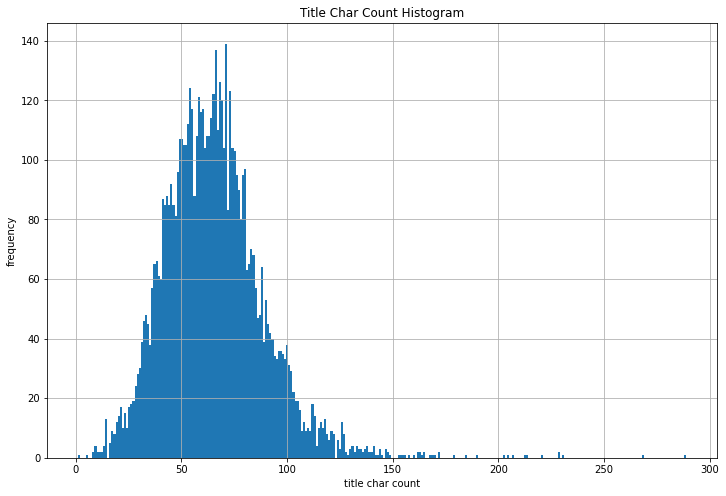

In [5]:
# Histogrm of atricle title char count
bins = df.title_char_cnt.max()
plt.figure(figsize=(12, 8))
plt.hist(df.title_char_cnt, bins=bins)
plt.xlabel('title char count')
plt.ylabel('frequency')
plt.title('Title Char Count Histogram')
plt.grid(True)
plt.show()

# Homework

### Explore the data

Create histograms to show the distributions of the different count columns. Also show histograms for the counts separated by fake and real news. Add markdown cells to the notebook with your observations about the distributions. Are there any differences between fake and real? What about word count vs character count?

If you find something in the data that seems interesting that you want to explore add that to the notebook along with your observations.

Calculate the min and max character and word counts for title and text columns.

Calculate the total number of distinct words across all articles. Note the difference between the max words in the text and the total number of unique words in the dataset.

### TFIDF - Term Frequency Inverse Document Frequency

Here is a good page that describes TFIDF and how to calculate it: http://www.tfidf.com/

Calculate the TFIDF scores for the following words: smell, the, this, washington, money, road, and

How are their scores different from each other? What does this mean?

Extra credit if you have time: what word in the articles has the highest and lowest TFIDF score?

### Stop Words

Here is a page that describes what are known as "stop words":
https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html

Based on this, do you expect stop words to have high or low TFIDF scores?


## Exploration 

Create histograms to show the distributions of the different count columns. Also show histograms for the counts separated by fake and real news. Add markdown cells to the notebook with your observations about the distributions. Are there any differences between fake and real? What about word count vs character count?

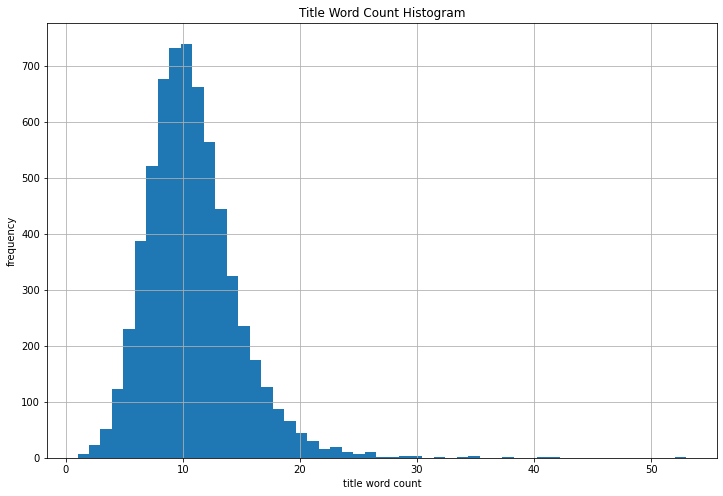

In [6]:
bins = df.title_word_cnt.max()
plt.figure(figsize=(12, 8))
plt.hist(df.title_word_cnt, bins=bins)
plt.xlabel('title word count')
plt.ylabel('frequency')
plt.title('Title Word Count Histogram')
plt.grid(True)
plt.show()

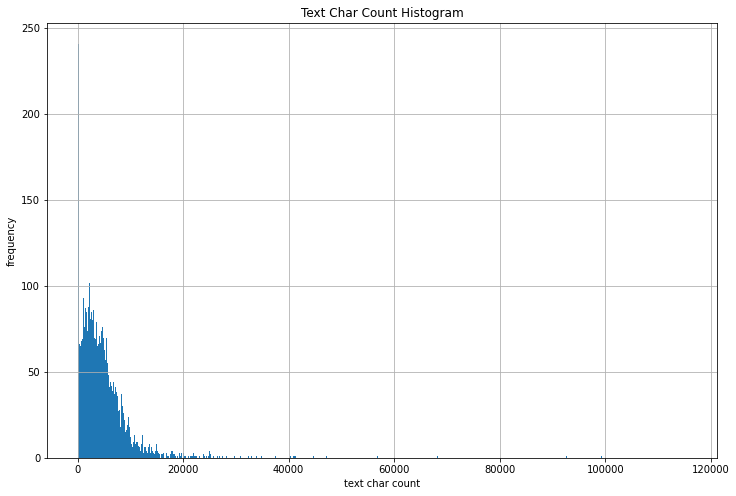

In [7]:
bins = int(df.text_char_cnt.max()/100)
plt.figure(figsize=(12, 8))
plt.hist(df.text_char_cnt, bins=bins)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

Interesting detail of Text Char count: plotting it naively hung because there were too many buckets. Distribution seems to be poisson or power-law-like.

### turbo: Picking Histogram Bin Sizes

I tend to like using use the max value of the x-axis as my bin size when the max value is less than a couple hundred. This way each individual count gets it's own bucket. This worked really well with the title histograms. It gives the most "visibility" to the distribution when you are dealing with whole numbers. 

When dealing with floats and my max value is less than 200-300, I'll often start by rounding the values to the nearest whole number and using max value as by bin count. Though, it really depends on the underlying distribution of values and how spread out they are. 

But if the x-axis is quite large, like this example, I'll play around with a much smaller value, like 100. If 100 seems too course grained, play around with the bin size to get a good level of detail

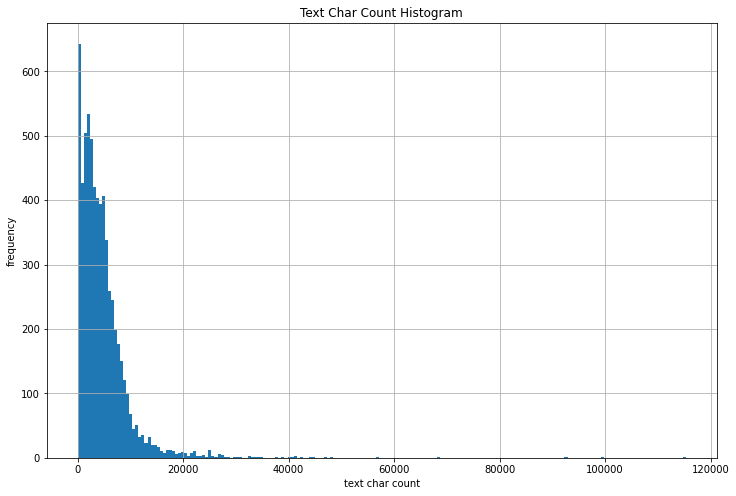

In [9]:
# turbo: for example
bins = 200
plt.figure(figsize=(12, 8))
plt.hist(df.text_char_cnt, bins=bins)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

### Turbo: Data Cleaning and Outlier Detection

You hit on this later on in your analysis, but I wanna bring up data cleanliness a bit earlier. There are 36 document, all fake, out of 3164 fake documents that have a title but no text. This is a small enough number of observations (documents) that we might want to consider filtering them out of our data set while doing this style of exploration. We don't know why they don't have any body to the article, but we can assume that articles we want to classify will have a body, so we want our training data to represent production data as best we can.

Early on in this process we should be looking not only for basic distributions and patters, but outliers in our data that we might want to exclude from our training data. Think of this process as unit tests for your data. What are the edge cases? Are there anomalies? Long tails? That sort of thing.

Another example might be a very low number of very large documents (15 docs with char length > 40,000). 

In [36]:
# turbo: blank documents
df[df['text_char_cnt'] < 2].shape

(36, 8)

In [37]:
# turbo: really long documents
df[df['text_char_cnt'] > 40000].shape

(15, 8)

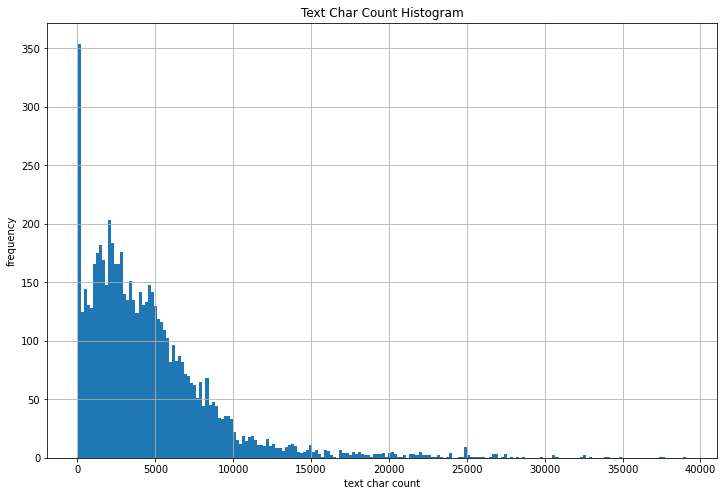

In [59]:
# turbo: replotting with these filter we get this
trimmed_df = df.query('text_char_cnt >= 2 & text_char_cnt <= 40000')
bins = 200
plt.figure(figsize=(12, 8))
plt.hist(trimmed_df.text_char_cnt, bins=bins)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

turbo: This gives us a better view of the distribution. You might even argue that we could filter the long tail down even more, maybe down to 20k chars possibly.

There is another interesting pattern here. It looks like there is a block of very short documents that doesn't quite fit the distribution. Let's pull this out and take a look.

(411, 8)


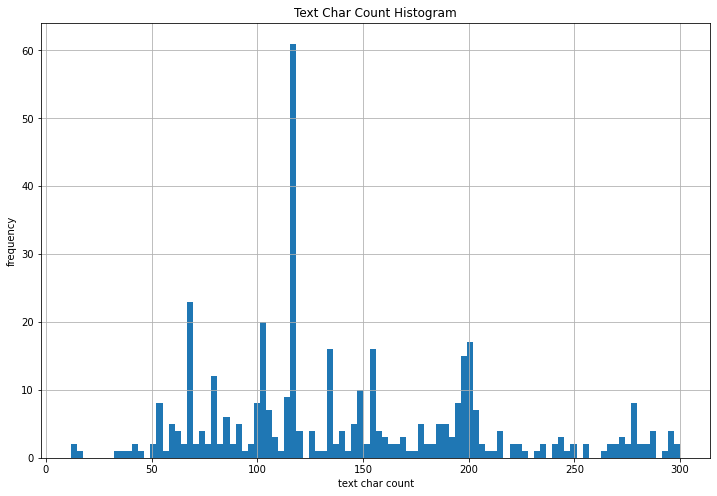

In [60]:
# turbo: short articles
short_df = trimmed_df.query('text_char_cnt <= 300')
print(short_df.shape)

bins = 100
plt.figure(figsize=(12, 8))
plt.hist(short_df.text_char_cnt, bins=bins)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

(5873, 8)


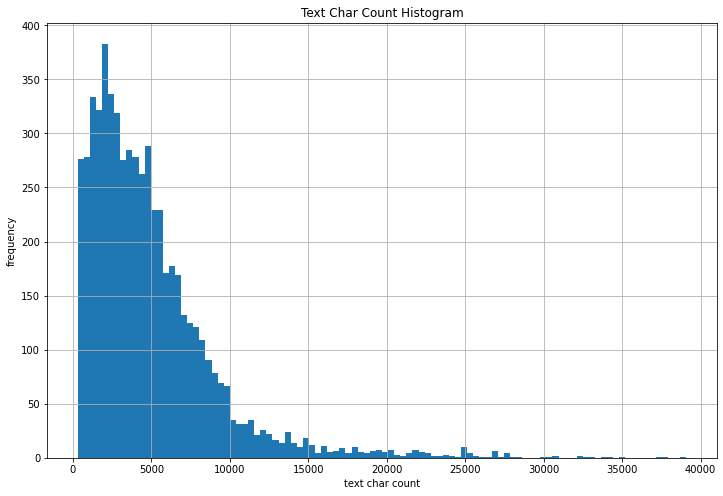

In [61]:
# turbo: regular articles
long_df = trimmed_df.query('text_char_cnt > 300')
print(long_df.shape)

bins = 100
plt.figure(figsize=(12, 8))
plt.hist(long_df.text_char_cnt, bins=bins)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

turbo: Why does this even matter? The plot where we filtered out really large articles and 1 char articles looked like there might be two different types of articles. Do we need two different models? One for longer in depth articles and one for short articles? Maybe, depends on customer needs and the volume of training data set have. But it's always best to try and understand the latent patterns underlying your training data.

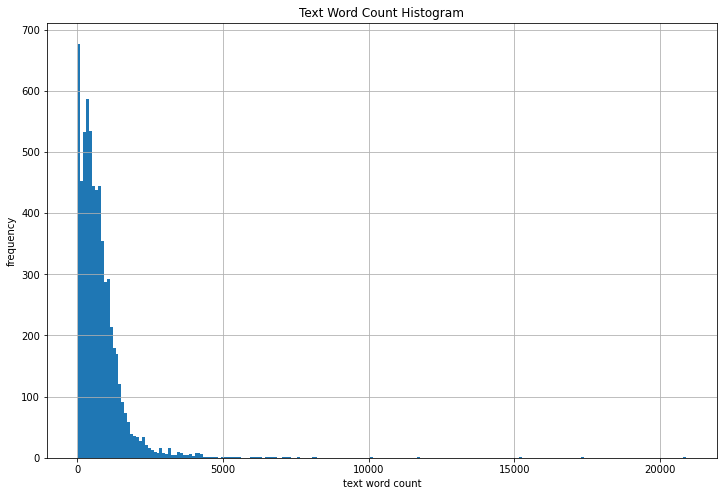

In [7]:
bins = int(df.text_word_cnt.max()/100)
plt.figure(figsize=(12, 8))
plt.hist(df.text_word_cnt, bins=bins)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text Word Count Histogram')
plt.grid(True)
plt.show()

Even stronger power-law-like behavior here. Super-long tail, but majority of the results are down at the bottom of the distribution. Question: correlation between place on the long tail and real/fake determination?

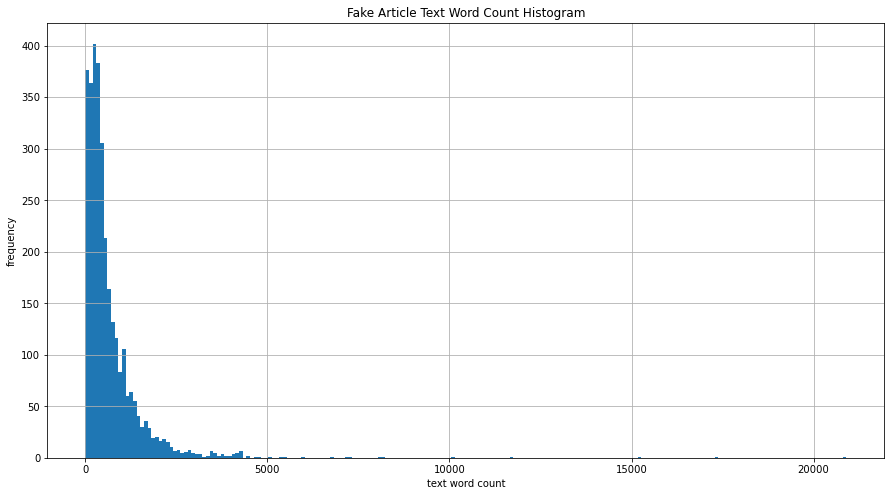

In [9]:
fake = df.loc[df['label'] == "FAKE"]
bins = int(df.text_word_cnt.max()/100)
plt.figure(figsize=(15, 8))
plt.hist(fake.text_word_cnt, bins=bins)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Fake Article Text Word Count Histogram')
plt.grid(True)
plt.show()

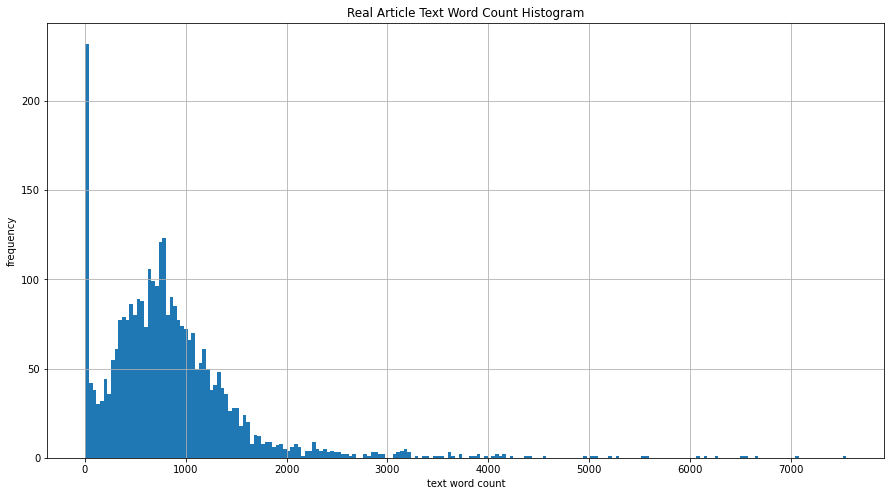

In [9]:
real = df.loc[df['label'] == "REAL"]
bins = int(df.text_word_cnt.max()/100)
plt.figure(figsize=(15, 8))
plt.hist(real.text_word_cnt, bins=bins)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Real Article Text Word Count Histogram')
plt.grid(True)
plt.show()

Real ones (ignoring the spike at 0...more on this later) are much more poisson-distributed, less power-law distributed. Also, long tail much less pronounced on real ones. Implies that there's a word count where stories become more likely to be real, but stories shorter (and especially much longer) become more likely to be fake. 

turbo: Great questions and analysis here. Looks like the distributions behind the two classes are different. When doing this type of data analysis and feature engineering, we're looking for potential features that will differentiate two two classes better.

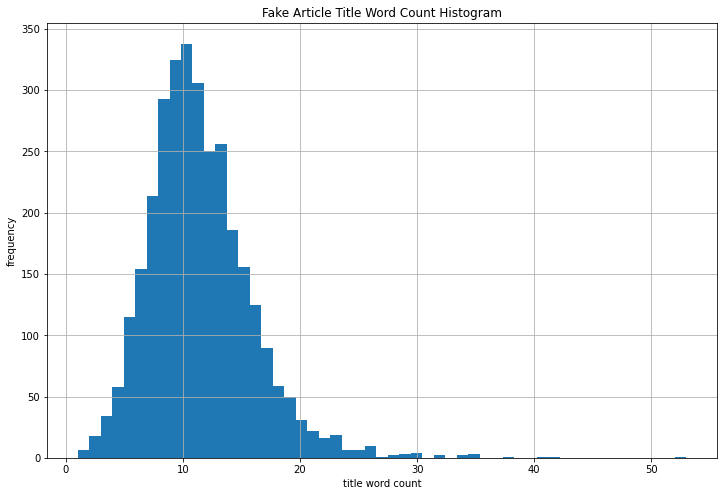

In [63]:
fake = df.loc[df['label'] == "FAKE"]
bins = df.title_word_cnt.max()
plt.figure(figsize=(12, 8))
plt.hist(fake.title_word_cnt, bins=bins)
plt.xlabel('title word count')
plt.ylabel('frequency')
plt.title('Fake Article Title Word Count Histogram')
plt.grid(True)
plt.show()

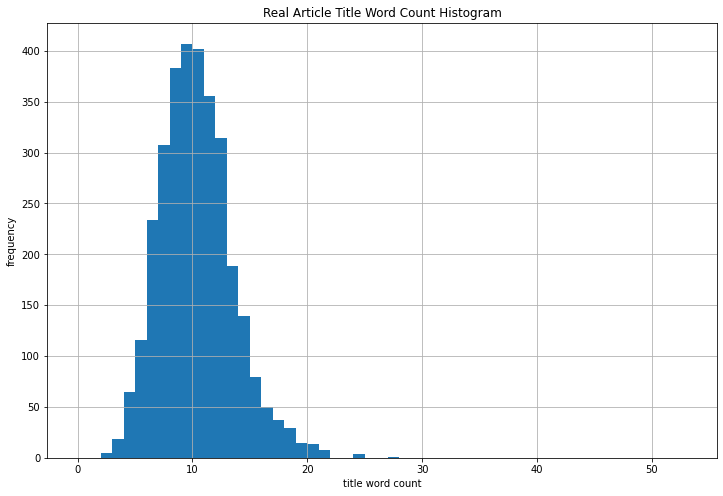

In [64]:
real = df.loc[df['label'] == "REAL"]
bins = df.title_word_cnt.max()
plt.figure(figsize=(12, 8))
# note: set explicit range on this histogram to make it scale identically to the fake title word count one.
plt.hist(real.title_word_cnt, bins=bins, range=[0,53])
plt.xlabel('title word count')
plt.ylabel('frequency')
plt.title('Real Article Title Word Count Histogram')
plt.grid(True)
plt.show()

Title word histograms much more similar between fake and real, but again fake ones seem to have longer tail. That may be an artifact of the data. Quick check: are the # of articles between the two samples the same?

turbo: super important question to ask! We need to know early on if our training data set is "balanced", meaning the number and positive and negative training examples are very close. Otherwise, we'll need to come up with ways to address this problem:

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [14]:
print(f"{len(real)} {len(fake)}")

3171 3164


close enough. So, the longer tail on the fake histogram isn't just an artifact of there being more fakes. 

Out of curiosity, for the text distributions, which had much clearer distribution differences, I'd like to plot the difference between the two histograms, to show explicitly how and where they diverge.

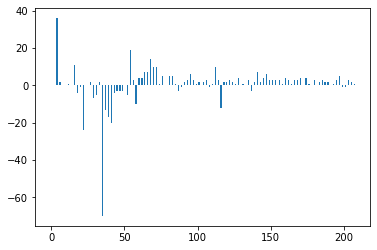

In [17]:
bins = int(df.text_word_cnt.max()/100)
fake_hist, _ = np.histogram(fake.text_word_cnt, range=[0,100], bins=bins)
real_hist, _ = np.histogram(real.text_word_cnt, range=[0,100], bins=bins)
residual = fake_hist - real_hist
plt.bar(range(bins), residual)
plt.show()

this says to me that there are ranges of text word counts where articles are much more likely to be fake, and others where it's more likely they're real.

turbo: nice viz! So stealing this.

I would drop the number of bins down to get better visual detail. Play with the bins to find a level that shows the delta between the two distributions well, but without losing resolution

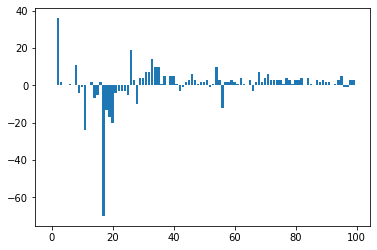

In [69]:
# turbo: fewer bins helps show the differences between the two distributions
bins = 100
fake_hist, _ = np.histogram(fake.text_word_cnt, range=[0,100], bins=bins)
real_hist, _ = np.histogram(real.text_word_cnt, range=[0,100], bins=bins)
residual = fake_hist - real_hist
plt.bar(range(bins), residual)
plt.show()

next up: Calculate the min and max character and word counts for title and text columns.

In [29]:
max_title_word_count = df.title_word_cnt.max()
max_body_word_count = df.text_word_cnt.max()
max_title_char_count = df.title_char_cnt.max()
max_body_char_count = df.text_char_cnt.max()
min_title_word_count = df.title_word_cnt.min()
min_body_word_count = df.text_word_cnt.min()
min_title_char_count = df.title_char_cnt.min()
min_body_char_count = df.text_char_cnt.min()
print(f"title word count: min {min_title_word_count} max {max_title_word_count}")
print(f"title char count: min {min_title_char_count} max {max_title_char_count}")
print(f"body word count: min {min_body_word_count} max {max_body_word_count}")
print(f"body char count: min {min_body_char_count} max {max_body_char_count}")

title word count: min 1 max 53
title char count: min 1 max 289
body word count: min 2 max 20897
body char count: min 1 max 115372


wait. How can the smallest body character count be 1, but word count be 2? A 1-character body should be 1 word

In [52]:
smallest_body_by_char = df.loc[df['text'] == " "]
smallest_body_by_word = df.loc[df['text_word_cnt'] <= 2]
assert len(smallest_body_by_word) == len(smallest_body_by_char)
smallest_body_by_word.head(1)


,Unnamed: 0,title,text,label,title_char_cnt,title_word_cnt,text_char_cnt,text_word_cnt
106,5530,The Arcturian Group by Marilyn Raffaele Octobe...,,FAKE,64,10,1,2


interesting conundrum at this point: don't want to change the initial data, but it's clear that dataset puts a single space in for a lot of the articles, possibly as the default "this story has no body" value, which makes our char and word counts potentially off by one since we're doing a split on spaces. (` " ".split(" ") ` returns two empty strings in python). 

I don't think that changes much about the analysis so far, since we've mostly been talking about statistical distributions, and it's clear from the assert that there are only one-character articles that are spaces, no other characters. But if we start talking about actual values of the counts (like if it makes a difference if an article is 0-character-length or 1-character length), should revisit this.

Next up: Calculate the total number of distinct words across all articles. Note the difference between the max words in the text and the total number of unique words in the dataset.

In [56]:
# I love that I can do this with python, but man do I find this way of notating it super-confusing
all_words = {word for body in df.text for word in body.split(" ")}
len(all_words)

274816

That's a super-naive way of doing that count, though. The split on spaces will leave in all punctuation, so `something` will be counted as a distinct word from `something.` We can do better with a regex to split on non-word characters, and force-lower-casing all the words, to avoid double-counting words that are capitalized at the beginning of sentances, etc:

In [57]:
import re
all_words = {word.lower() for body in df.text for word in re.split("\W+", body) if word}
len(all_words)

67719

That count may be mis-leading a bit since it's treating -'s as punctuation, so `mis-leading` would be counted in that analysis as 2 words. Plurals and word stemming (ran/run/running) also a potential problem if you want to get a full count of all words. Skipping that for the moment.

turbo: great observation on tokenizing the text. We'll eventually want to normalize the text to convert each word to it's base word stem. There are techniques called `stemming` and `lemmatization` that can do this for us.

https://www.guru99.com/stemming-lemmatization-python-nltk.html

## TF-IDF

Calculate the TFIDF scores for the following words: smell, the, this, washington, money, road, and

### turbo: oops, sorry

So I wasn't thinking when I wrote this part of the homework. Since TFIDF is document specific, you can't calculate the tfidf value for a word across the entire data set. 

You could calculate the tfidf scores for these words for every document, and show each word's distribution. That might be interesting. 

Mostly I was just trying to get you to manually calc tfidf because nothing makes memories sticky like manually calculating something out :)

Definitions: 

tf = # of times term is in doc / # of terms in doc
 
idf = ln(num_documents/num documents that contain term)
 
tfidf = tf * idf

Note: for purposes of "doc" in these computations, I'm going to combine the title and the text into one big doc. Also, note: tf is document-specific, so isn't a global property of the system. Have to compute it doc-by-doc, so tf-idf will also be doc-specific.

Plan at the moment: pre-compute the term counts (per word and total doc) as another object, query those to answer various questions. 

### turbo observation: 

it might be interesting at some point to calc tfidf for both titles and documents separably, and use both the title and the body feature spaces as input for our model(s). 

The reason I'd lean this way, is more than likely the key words in the title will already exist in the body. And since titles are generally fairly short and don't repeat key words, adding the title to the body probably wont add much information to the body.

Also, how an article's title is crafted is a key component to determining if a person will bother reading the article or not. So titles are often highly crafted, short sentences. This means that they might be a good feature for determining if an article is fake or not. But if the title is included in the body, this signal is lost (or at least diminished)

In [70]:
term_count = dict()
counter = 0
for body, title in zip(df['text'], df['title']):
    all_words = body +  " " + title
    word_collection = Counter()
    for word in re.split("\W+", all_words):
        if word:
            word_collection[word.lower()] += 1
    word_collection["__total__"] = len(all_words)
    term_count[counter] = word_collection
    counter += 1

turbo: OMG! there is a Counter class in python? Can't tell you how many time's I've coded this pattern

In [72]:
num_docs = len(term_count.keys())
doc_id = 0
for term in ("smell", "the", "this", "washington", "money", "road", "and"):
    tf = term_count[doc_id][term] / term_count[doc_id]["__total__"]
    num_docs_with_term = sum(1 for doc_id in term_count if term_count[doc_id][term])
    idf = np.log(num_docs/(1+num_docs_with_term))
    tf_idf = tf * idf
    print(f"{term}\t tf = {tf}\t idf = {idf}\t tf-idf = {tf_idf}")

smell	 tf = 0.00026500596263415925	 idf = 5.257337531288759	 tf-idf = 0.001393225793371872
the	 tf = 0.012322777262488406	 idf = 0.019767900195936484	 tf-idf = 0.00024359543106162621
this	 tf = 0.0007950178879024779	 idf = 0.22018817530833698	 tf-idf = 0.00017505353807473458
washington	 tf = 0.0	 idf = 1.3362646903406952	 tf-idf = 0.0
money	 tf = 0.0	 idf = 1.794446580621264	 tf-idf = 0.0
road	 tf = 0.0	 idf = 3.0839641697747195	 tf-idf = 0.0
and	 tf = 0.003975089439512389	 idf = 0.055998401645744385	 tf-idf = 0.00022259865501157171


How are their scores different from each other? What does this mean

The TF will be high for common words ("the", "and"), but always less than 1. The IDF will be small for common words, and large for uncommon ones, and IDF will be less than 1 for words that are very common. When multiplied together, if both are less than 1, the result gets even smaller, so common words will have a smaller tf-idf than unusual ones. For example, in doc 0, "the", "this", and "and" are common, while "smell" is uncommon, so the tf-idf of the common ones is approximately 1 factor of 10 smaller for the common words.

At first glance (need to think about this more) tf-idf will be large for words that are special/unusual in the set of docs, and be consistently small for words that are common across all documents. 

turbo: Yup, exactly. 

## Stop words

Based on that, I'd expect a stop word like "the" to have a consistently-low tf-idf. A good stop word candidate will be common in a given document and common across all documents. 

## Turbo: Just curious about char to word length ratios

In [75]:
ratio_df = df
ratio_df['char_to_word'] = ratio_df['text_char_cnt'] / ratio_df['text_word_cnt']
ratio_df

,Unnamed: 0,title,text,label,title_char_cnt,title_word_cnt,text_char_cnt,text_word_cnt,char_to_word
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,5,7518,1298,5.791988
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,14,2646,446,5.932735
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,9,2543,423,6.011820
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,15,2660,404,6.584158
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,9,1840,307,5.993485
...,...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,69,11,4076,629,6.480127
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,10,14323,2183,6.561154
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,66,13,11974,1910,6.269110
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,67,11,6991,1093,6.396157


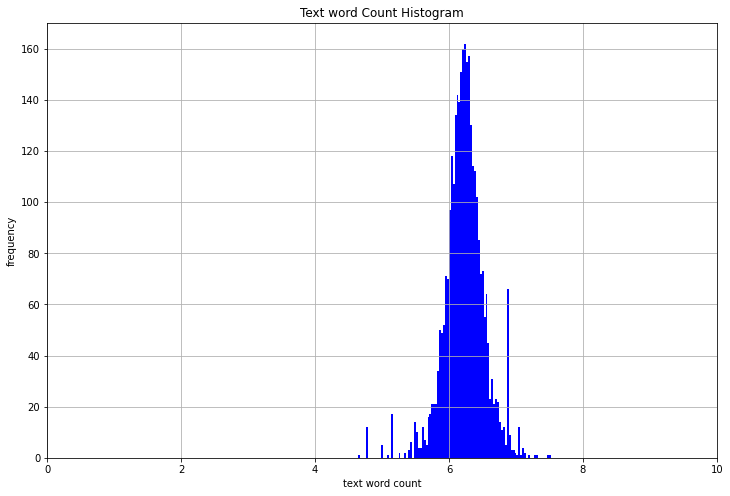

In [110]:
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[ratio_df['label'] == "REAL"]['char_to_word'], bins=bins, color="blue")
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

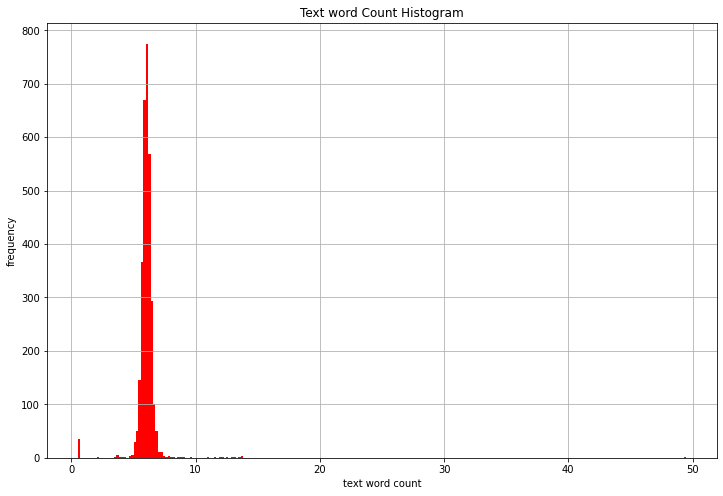

In [108]:
bins = 250
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[ratio_df['label'] == "FAKE"]['char_to_word'], bins=bins, color="red")
plt.xlabel('text word count')
plt.ylabel('frequency')
# plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

turbo: check out the delta on the Y axis for these two plots

In [96]:
# how many docs have a ratio greater than 10 chars?
ratio_df[(ratio_df['label'] == "FAKE") & (ratio_df['char_to_word'] > 10)].shape

(15, 9)

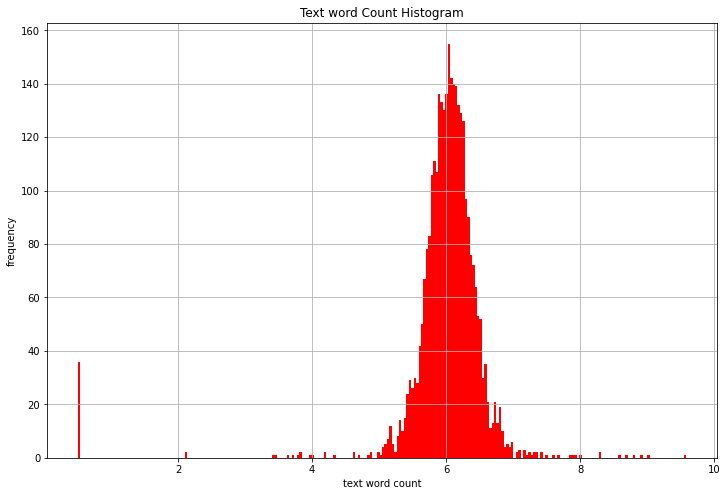

In [107]:
# not that many, lets filter them out
bins = 250
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[(ratio_df['label'] == "FAKE") & (ratio_df['char_to_word'] <= 10)]['char_to_word'], bins=bins, color="red")
plt.xlabel('text word count')
plt.ylabel('frequency')
# plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

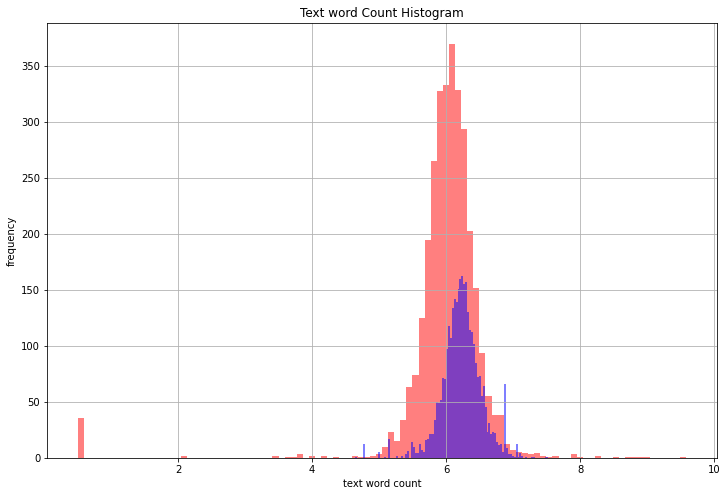

In [112]:
# lets overlay the two distributions
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[(ratio_df['label'] == "FAKE") & (ratio_df['char_to_word'] <= 10)]['char_to_word'], bins=bins, color="red", alpha=0.5)
plt.hist(ratio_df[ratio_df['label'] == "REAL"]['char_to_word'], bins=bins, color="blue", alpha=0.5)
plt.xlabel('text word count')
plt.ylabel('frequency')
# plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

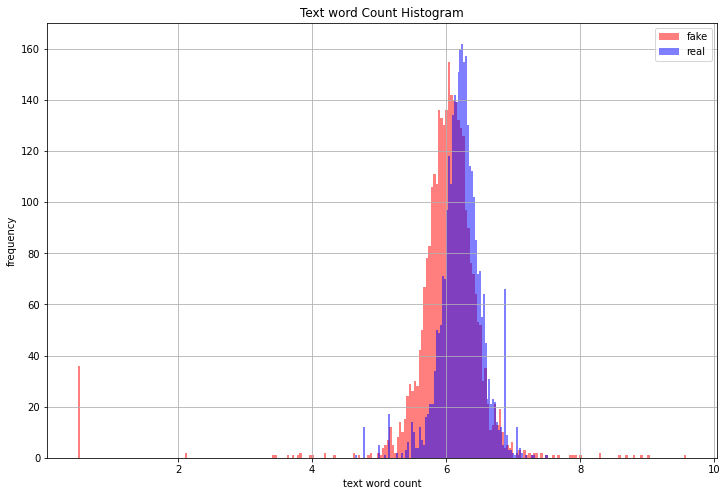

In [117]:
# lets overlay the two distributions
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[(ratio_df['label'] == "FAKE") & (ratio_df['char_to_word'] <= 10)]['char_to_word'], bins=250, color="red", alpha=0.5, label="fake")
plt.hist(ratio_df[ratio_df['label'] == "REAL"]['char_to_word'], bins=100, color="blue", alpha=0.5, label="real")
plt.xlabel('text word count')
plt.ylabel('frequency')
# plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()